In [3]:
import pandas as pd

In [4]:
# insert the data 
t1 = pd.read_csv('D:\python\project 2\customer_details.csv',header = None,
                 names = ['customer_id','Gender','age','driving_licence_present','region_code',
                          'previously_insured','vehicle_age','vehicle_damage'])

In [5]:
t1

,customer_id,Gender,age,driving_licence_present,region_code,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [6]:
# insert the data 

t2 = pd.read_csv('D:\python\project 2\customer_policy_details.csv',header = None,
                 names = ['customer_id','annual_premium_Rs','sales_channel_code','vintage','response'])

In [7]:
t2

,customer_id,annual_premium_Rs,sales_channel_code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [8]:
t1.shape[1]
t1.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving_licence_present    393
region_code                392
previously_insured         381
vehicle_age                381
vehicle_damage             407
dtype: int64

In [9]:
t2.shape[1]
t2.isnull().sum()

customer_id           387
annual_premium_Rs     346
sales_channel_code    400
vintage               388
response              361
dtype: int64

In [10]:
t1.dropna(subset =['customer_id'],inplace = True)
t1.isnull().sum()

customer_id                  0
Gender                     368
age                        366
driving_licence_present    392
region_code                391
previously_insured         381
vehicle_age                381
vehicle_damage             406
dtype: int64

In [11]:
t2.dropna(subset =['customer_id'],inplace = True)
t2.isnull().sum()

customer_id             0
annual_premium_Rs     344
sales_channel_code    400
vintage               388
response              361
dtype: int64

In [12]:
t1['age'].fillna(t1['age'].mean(),inplace=True)

In [13]:
t1.isnull().sum()

customer_id                  0
Gender                     368
age                          0
driving_licence_present    392
region_code                391
previously_insured         381
vehicle_age                381
vehicle_damage             406
dtype: int64

In [14]:
# numeric
t2['sales_channel_code'].fillna(t2['sales_channel_code'].mean(),inplace=True)

In [15]:
t2.isnull().sum()

customer_id             0
annual_premium_Rs     344
sales_channel_code      0
vintage               388
response              361
dtype: int64

In [16]:
# Categorical value
t1['previously_insured'].fillna(t1['previously_insured'].mode(),inplace=True)

In [17]:
t1.isnull().sum()

customer_id                  0
Gender                     368
age                          0
driving_licence_present    392
region_code                391
previously_insured         381
vehicle_age                381
vehicle_damage             406
dtype: int64

In [18]:
t2['response'].fillna(t2['response'].mode(),inplace=True)

In [19]:
t2.isnull().sum()

customer_id             0
annual_premium_Rs     344
sales_channel_code      0
vintage               388
response              361
dtype: int64

In [20]:
t3 = {}
a = t1.describe(percentiles =[.25,.75])
mean = a.values[1] # etract the mean from c
Q1 = a.values[4] # etract a 25 percentile from c
Q3 = a.values[6] # etract a 75 percentile from c
IQR = Q3 - Q1
Low = Q1-1.5*IQR
high =  Q1+1.5*IQR
t3 = (Low,high)
t3

(array([-1.9056e+05, -1.1000e+01,  1.0000e+00, -1.5000e+01, -1.5000e+00]),
 array([3.81099e+05, 6.10000e+01, 1.00000e+00, 4.50000e+01, 1.50000e+00]))

In [21]:
#Replace all outlier values for numeric columns by mean. 
import pandas as pd 
import numpy as np

for i in a.columns:
    if a[i].dtype == 'int' or a[i].dtype == 'float':
        Q1 = a[i].describe()['25%']
        Q3 = a[i].describe()['75%']
        IQR = Q3 -Q1
        low = Q1 - 1.5*IQR
        high = Q1 + 1.5*IQR
        a[i] = np.where(a[i] < low , a[i].mean(),a[i])
        a[i] = np.where(a[i] > high , a[i].mean(),a[i])
print(a)

         customer_id           age  driving_licence_present   region_code  \
count  380723.000000  47624.040952             59427.501108  47562.702488   
mean   190548.776244     38.822788                 0.997868     26.389436   
std    110016.805160     15.504826             59427.501108     13.230467   
min         1.000000     20.000000             59427.501108      0.000000   
25%     95269.500000     25.000000                 1.000000     15.000000   
50%    190543.000000     36.000000                 1.000000     28.000000   
75%    285822.500000     49.000000                 1.000000     35.000000   
max    381109.000000  47624.040952                 1.000000  47562.702488   

       previously_insured  
count        47543.119564  
mean             0.458259  
std              0.498255  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000  


In [22]:
t4 = {}
c = t2.describe(percentiles = [.25,.75])
mean = c.values[1]
Q1 = c.values[4] 
Q3 = c.values[6]
IQR = Q3 - Q1
Low = Q1-1.5*IQR
high =  Q1+1.5*IQR
t4  = (Low,high)
t4

(array([-1.905375e+05,  1.914875e+03, -1.555000e+02, -1.355000e+02,
         0.000000e+00]),
 array([3.8109000e+05, 4.6899125e+04, 2.1350000e+02, 2.9950000e+02,
        0.0000000e+00]))

In [23]:
# Replace all outlier values for numeric columns by mean. 


import pandas as pd
import numpy as np


for col_name in c.columns:
    if c[col_name].dtype == 'int64' or c[col_name].dtype == 'float64':
        q1 = c[col_name].quantile(0.25)
        q3 = c[col_name].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - 1.5 * iqr
        fence_high = q3 + 1.5 * iqr
        c[col_name] = np.where(c[col_name] < fence_low, c[col_name].mean(), c[col_name])
        c[col_name] = np.where(c[col_name] > fence_high,c[col_name].mean(), c[col_name])

print(c)

         customer_id  annual_premium_Rs  sales_channel_code       vintage  \
count  380722.000000      133301.333582        47670.526717  47668.002242   
mean   190547.491663       30563.999774          112.036687    154.347192   
std    110013.824148       17197.918886           54.177046     83.670742   
min         1.000000        2630.000000            1.000000     10.000000   
25%     95276.250000       24407.000000           29.000000     82.000000   
50%    190536.500000       31667.000000          131.000000    154.000000   
75%    285818.750000       39401.750000          152.000000    227.000000   
max    381109.000000      133301.333582          163.000000    299.000000   

           response  
count  47545.306302  
mean       0.122526  
std        0.327892  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [24]:
t1.describe()

,customer_id,age,driving_licence_present,region_code,previously_insured
count,380723.000000,380723.000000,380331.000000,380332.000000,380342.000000
mean,190548.776244,38.822788,0.997868,26.389436,0.458259
std,110016.805160,15.504826,0.046128,13.230467,0.498255
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [25]:
t2.describe()

,customer_id,annual_premium_Rs,sales_channel_code,vintage,response
count,380722.000000,380378.000000,380722.000000,380334.000000,380361.000000
mean,190547.491663,30563.999774,112.036687,154.347192,0.122526
std,110013.824148,17197.918886,54.177046,83.670742,0.327892
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24407.000000,29.000000,82.000000,0.000000
50%,190536.500000,31667.000000,131.000000,154.000000,0.000000
75%,285818.750000,39401.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [26]:
# white space remove
t1.apply(lambda a: a.str.strip() if a.dtype == "object" else a)

,customer_id,Gender,age,driving_licence_present,region_code,previously_insured,vehicle_age,vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [27]:
t2.apply(lambda b: b.str.strip() if b.dtype == "object" else b)

,customer_id,annual_premium_Rs,sales_channel_code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [28]:
# lower values to convert
t1.apply(lambda a: a.str.lower() if a.dtype == "object" else a)

,customer_id,Gender,age,driving_licence_present,region_code,previously_insured,vehicle_age,vehicle_damage
0,1.0,male,44.0,1.0,28.0,0.0,> 2 years,yes
1,2.0,male,76.0,1.0,3.0,0.0,1-2 year,no
2,3.0,male,47.0,1.0,28.0,0.0,> 2 years,yes
3,4.0,male,21.0,1.0,11.0,1.0,< 1 year,no
4,5.0,female,29.0,1.0,41.0,1.0,< 1 year,no
...,...,...,...,...,...,...,...,...
381104,381105.0,male,74.0,1.0,26.0,1.0,1-2 year,no
381105,381106.0,male,30.0,1.0,37.0,1.0,< 1 year,no
381106,381107.0,male,21.0,1.0,30.0,1.0,< 1 year,no
381107,381108.0,female,68.0,1.0,14.0,0.0,> 2 years,yes


In [29]:
t2.apply(lambda b: b.str.lower() if b.dtype == "object" else b)

,customer_id,annual_premium_Rs,sales_channel_code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [30]:
# dummies 
pd.get_dummies(t1, prefix=None, prefix_sep='_', dummy_na=False,sparse=False, dtype=None)


,customer_id,age,driving_licence_present,region_code,previously_insured,Gender_Female,Gender_Male,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years,vehicle_damage_No,vehicle_damage_Yes
0,1.0,44.0,1.0,28.0,0.0,0,1,0,0,1,0,1
1,2.0,76.0,1.0,3.0,0.0,0,1,1,0,0,1,0
2,3.0,47.0,1.0,28.0,0.0,0,1,0,0,1,0,1
3,4.0,21.0,1.0,11.0,1.0,0,1,0,1,0,1,0
4,5.0,29.0,1.0,41.0,1.0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,74.0,1.0,26.0,1.0,0,1,1,0,0,1,0
381105,381106.0,30.0,1.0,37.0,1.0,0,1,0,1,0,1,0
381106,381107.0,21.0,1.0,30.0,1.0,0,1,0,1,0,1,0
381107,381108.0,68.0,1.0,14.0,0.0,1,0,0,0,1,0,1


In [31]:
pd.get_dummies(t1)

,customer_id,age,driving_licence_present,region_code,previously_insured,Gender_Female,Gender_Male,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years,vehicle_damage_No,vehicle_damage_Yes
0,1.0,44.0,1.0,28.0,0.0,0,1,0,0,1,0,1
1,2.0,76.0,1.0,3.0,0.0,0,1,1,0,0,1,0
2,3.0,47.0,1.0,28.0,0.0,0,1,0,0,1,0,1
3,4.0,21.0,1.0,11.0,1.0,0,1,0,1,0,1,0
4,5.0,29.0,1.0,41.0,1.0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,74.0,1.0,26.0,1.0,0,1,1,0,0,1,0
381105,381106.0,30.0,1.0,37.0,1.0,0,1,0,1,0,1,0
381106,381107.0,21.0,1.0,30.0,1.0,0,1,0,1,0,1,0
381107,381108.0,68.0,1.0,14.0,0.0,1,0,0,0,1,0,1


In [32]:
pd.get_dummies(t2, prefix=None, prefix_sep='_', dummy_na=False,sparse=False, dtype=None)


,customer_id,annual_premium_Rs,sales_channel_code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [33]:
# Drop Duplicates
t1.drop_duplicates(subset=None,keep = 'first',inplace = True)

In [34]:
t2.drop_duplicates(subset=None,keep = 'first',inplace = True)

In [35]:
master_table = pd.merge(t1,t2,on='customer_id')
master_table

,customer_id,Gender,age,driving_licence_present,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium_Rs,sales_channel_code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


In [36]:
master_table.groupby('vehicle_age')['annual_premium_Rs'].mean()

vehicle_age
1-2 Year     30522.422917
< 1 Year     30115.361397
> 2 Years    35661.355606
Name: annual_premium_Rs, dtype: float64

In [37]:

master_table.groupby('age')['annual_premium_Rs'].mean()

age
20.0    26920.517153
21.0    30564.476130
22.0    30824.039423
23.0    30688.699065
24.0    31184.306152
            ...     
81.0    31201.571429
82.0    37705.379310
83.0    31012.727273
84.0    35440.818182
85.0    29792.363636
Name: annual_premium_Rs, Length: 67, dtype: float64

In [38]:
result =master_table.groupby('Gender')['annual_premium_Rs'].mean()
result

Gender
Female    30491.959528
Male      30624.674414
Name: annual_premium_Rs, dtype: float64

In [39]:
import matplotlib.pyplot as pyplot

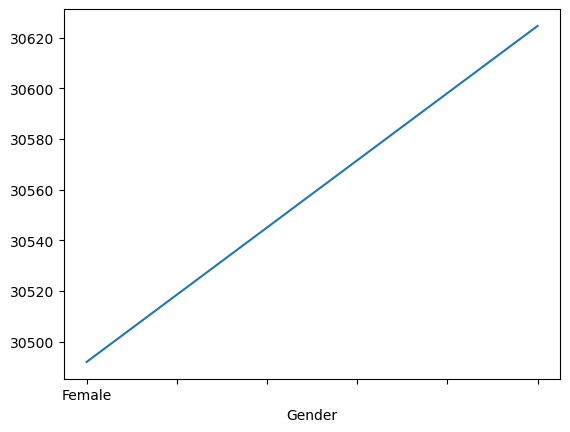

In [43]:
result.plot()
pyplot.show()

In [41]:
t3 = master_table.groupby('vehicle_age')['annual_premium_Rs'].mean()
t3

vehicle_age
1-2 Year     30522.422917
< 1 Year     30115.361397
> 2 Years    35661.355606
Name: annual_premium_Rs, dtype: float64

In [42]:
n = master_table['age'].corr(master_table['annual_premium_Rs'])
if n < -0.5:
    print('strong negative relationship')
if n > 0.5:
    print('strong positive relationship')
if 0.5 < n < 0.5:
    print('There is no relationship')